In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Functions for Fitting

In [87]:
def non_lin_double_gauss(x,c1,c2,c3,c4,c5,c6,c7,c8,c9):
    return c8*np.exp(-((x-c1)**2)/(2*c2**2)) + c9*np.exp(-((x-c3)**2)/(2*c4**2)) + c5*(x**2) + c6*x + c7

def fitting(x,y):
    xdata = np.asarray(x)
    ydata = np.asarray(y)

    parameters, covariance = curve_fit(non_lin_double_gauss, xdata, ydata,p0=[400,1,450,1,0.05,0.01,400,4000,4000])

    return parameters, covariance
X = np.arange(0,1024)


# Data Collection

In [72]:
dataco = pd.read_excel("data4.ods", engine="odf",header=0,usecols="B")
datacs = pd.read_excel("data4.ods", engine="odf",header=0,usecols="C")

In [30]:
datacs

,CountsCs
0,0
1,31
2,42
3,29
4,0
...,...
1019,0
1020,0
1021,0
1022,0


In [31]:
y = np.array([int(i) for i in dataco["Counts"]])
x = np.arange(0,len(y))
y1 = np.array([int(i) for i in datacs["CountsCs"]])
x1 = np.arange(0,len(y1))

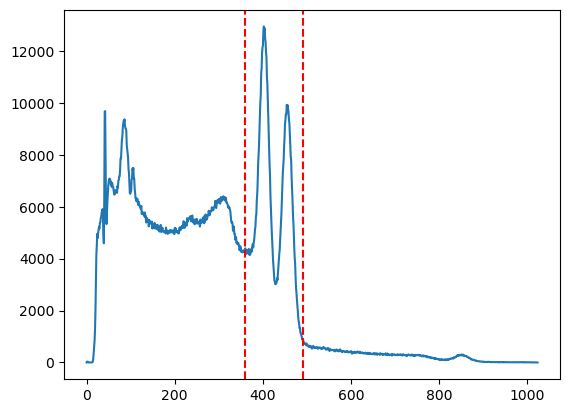

In [73]:
plt.plot(x,y)
# cutoffs
i = 360
f = 490
plt.axvline(x=i, color='r', linestyle='--')
plt.axvline(x=f, color='r', linestyle='--')

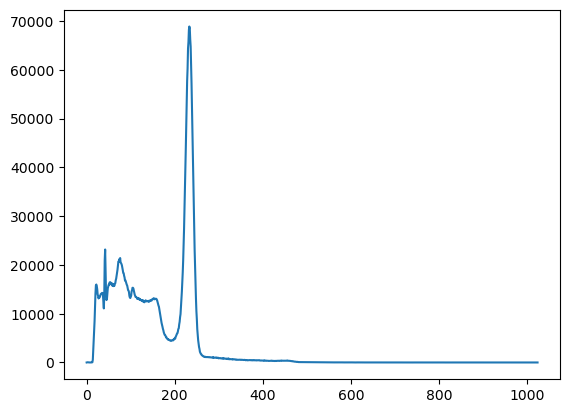

In [35]:
plt.plot(x1,y1)

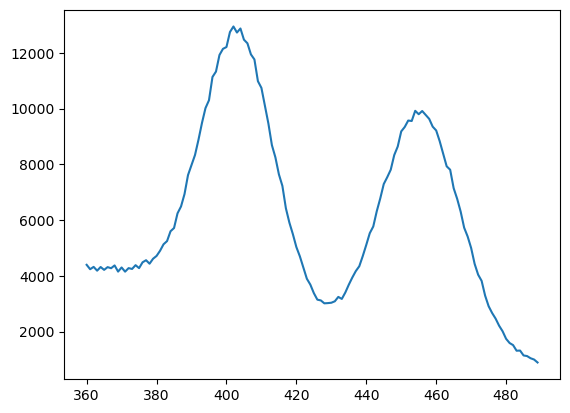

In [62]:
ytrunc = y[i:f]
xtrunc = x[i:f]
plt.plot(xtrunc,ytrunc)

In [74]:
# pinit = [400,1,450,1,0.05,0.01,400,4000,4000]
pinit = [400,1,450,1,0,0,0,0,0]
p0 = pinit

# Fit

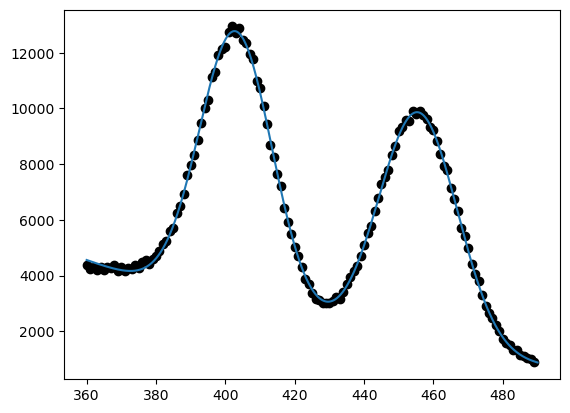

In [83]:
popt, pcov = curve_fit(non_lin_double_gauss,xtrunc,ytrunc, pinit)
perr = np.sqrt(np.diag(pcov))
xval = np.linspace(360,490,1000)
yval = non_lin_double_gauss(xval,*popt)
plt.scatter(xtrunc,ytrunc, marker="o", color="k")
plt.plot(xval,yval)


In [78]:
print(*popt)

403.00965303677907 10.501961170893816 455.5831589324632 11.356450784078401 0.11890238063457342 -129.9990569099987 35950.096565717016 9898.959942044623 8459.952393568661


In [86]:
datapmt = pd.read_excel("data4.ods", engine="odf",header=0,usecols="D,E,F")
datapmt

,Count642,Count648,Count654
0,0,0,0
1,5,4,6
2,6,3,11
3,4,6,6
4,0,0,0
...,...,...,...
1019,0,0,0
1020,0,0,0
1021,0,0,0
1022,0,0,0


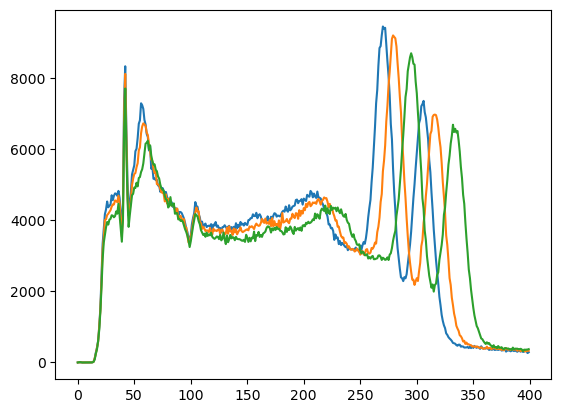

In [103]:
PMTvar = len(datapmt.keys())
dat = []
for i in range(0,PMTvar):
    t =  [int(i) for i in datapmt[datapmt.keys()[i]]]
    dat.append(t)
    plt.plot(X[:400],dat[i][:400])

In [101]:
datnp = np.array(dat)
datnp

array([[ 0,  5,  6, ...,  0,  0,  0],
       [ 0,  4,  3, ...,  0,  0,  0],
       [ 0,  6, 11, ...,  0,  0,  0]])

In [93]:
poptpmt = np.zeros((PMTvar,9))
perrpmt = np.zeros((PMTvar,9))

In [ ]:
for i in range(0,PMTvar):
    poptpmt[i], pcov = fitting(X,datapmt.iloc[:,i])